In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("Data/sales_subset.csv",index_col=0)
df.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


<Axes: >

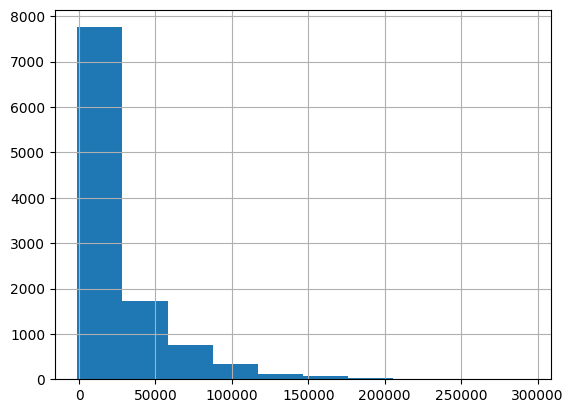

In [7]:
df["weekly_sales"].hist()

<Axes: >

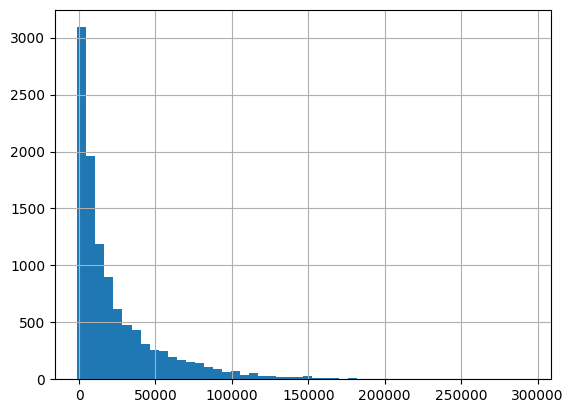

In [10]:
df["weekly_sales"].hist(bins=50)

In [14]:
df = pd.read_csv("Data/homelessness.csv",index_col=0)
dfIsta = pd.DataFrame(df.groupby(["region"])[["family_members","individuals"]].mean()).reset_index()

In [17]:
dfIsta

,region,family_members,individuals
0,East North Central,2800.400000,5081.200000
1,East South Central,972.250000,3117.000000
2,Mid-Atlantic,20256.333333,18012.666667
3,Mountain,1157.250000,3561.375000
4,New England,2916.500000,2150.500000
5,Pacific,6632.400000,28427.200000
6,South Atlantic,2646.444444,5806.666667
7,West North Central,1177.428571,1995.857143
8,West South Central,2027.500000,6710.500000


<Axes: >

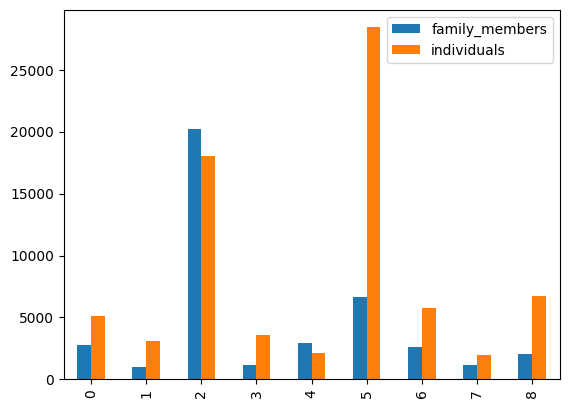

In [15]:

dfIsta.plot(kind="bar")

---------------------

##### Örnek CSV to JSON 

In [3]:
import pandas as pd
df = pd.read_csv("/workspace/DataMiningFundamentals/ornekdata/data2.csv",delimiter=";")
df.head()

,barkod_no,il_id,merkez_no,sube_no,sicil_no,cihet_no,islem_tarih,islem_saat,gonderi_durum_id,aciklama
0,CZ01770755015,341,12864,0,649408,NaN,20230712,18381067,11,NaN
1,RR07583805978,21,11924,51,250852,NaN,20230714,13520003,1,NaN
2,RR07583805978,21,11924,51,250852,NaN,20230714,13520005,3,NaN
3,2753064875203,42,12781,0,652376,NaN,20230715,19463016,3,NaN
4,2753064875203,42,13201,0,613172,NaN,20230717,8451816,11,NaN


In [66]:
kayitlar = []
for barkod in df.barkod_no.unique():
    kayit = []
    # print(item)
    kayit.insert(0,barkod)
    digerSutunlar= df.columns[1:]
    for sutun in digerSutunlar:
        kayit.append(list(df[df["barkod_no"] == barkod][sutun]))
    kayitlar.append(kayit)

dfJson = pd.DataFrame(kayitlar).set_index(0)
dfJson.columns = df.columns[1:]
dfJson.to_json("ornekdata.json",orient="index")

CZ01770755015
RR07583805978
2753064875203
2650289492157
2650289244749
KP80035242682
5354049535005


In [11]:
import json
json.load(open("ornekdata.json"))

{'CZ01770755015': {'il_id': [341, 341, 341, 341, 341, 341, 341],
  'merkez_no': [12864, 12997, 12997, 12864, 10199, 10199, 12997],
  'sube_no': [0, 0, 0, 0, 0, 0, 0],
  'sicil_no': [649408, 654408, 626351, 644488, 256852, 256852, 641343],
  'cihet_no': [None, None, 40137065.0, None, None, None, None],
  'islem_tarih': [20230712,
   20230718,
   20230717,
   20230713,
   20230712,
   20230712,
   20230713],
  'islem_saat': [18381067, 10780, 10270700, 124154, 9365992, 9365994, 9160714],
  'gonderi_durum_id': [11, 813, 7, 3, 1, 3, 11],
  'aciklama': [None,
   None,
   '/ 366 (654408-SEM?H CAN SEFERO?LU)',
   None,
   None,
   None,
   None]},
 'RR07583805978': {'il_id': [21, 21, 47, 47, 21, 21, 47, 47, 47],
  'merkez_no': [11924, 11924, 7575, 6700, 9084, 9084, 6700, 6700, 7575],
  'sube_no': [51, 51, 0, 0, 0, 0, 0, 0, 0],
  'sicil_no': [250852,
   250852,
   245023,
   248343,
   607347,
   607347,
   240782,
   248343,
   245023],
  'cihet_no': [None, None, None, 40117172.0, None, None, 

In [42]:
dfYeni[df.barkod_no == '2650289244749']["il_id"]

,barkod_no,il_id,merkez_no,sube_no,sicil_no,cihet_no,islem_tarih,islem_saat,gonderi_durum_id,aciklama
6,2650289244749,342,8581,0,648736,NaN,20230714,9135981,3,NaN
12,2650289244749,342,8581,0,8581,NaN,20230714,6405991,11,NaN
20,2650289244749,342,13920,0,603635,40136845.0,20230717,10515659,7,/ (603635-FAT?H YARICI) -(ELT)
37,2650289244749,6,12914,58,634828,NaN,20230713,10311081,1,NaN
38,2650289244749,6,12914,58,634828,NaN,20230713,10311104,3,NaN
54,2650289244749,6,12914,0,12914,NaN,20230713,12245375,11,NaN
55,2650289244749,6,12914,0,620644,NaN,20230713,12480159,3,NaN
56,2650289244749,342,13920,0,649279,NaN,20230717,8183352,11,NaN
58,2650289244749,342,13920,0,603635,NaN,20230718,33368,100,NaN


In [4]:
%pip install pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 14.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 13.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


-------------------

#### Veri Görselleştirme

In [3]:
import pandas as pd
df = pd.read_csv("Data/data2.csv",delimiter=";")
df.head()

,barkod_no,il_id,merkez_no,sube_no,sicil_no,cihet_no,islem_tarih,islem_saat,gonderi_durum_id,aciklama
0,CZ01770755015,341,12864,0,649408,NaN,20230712,18381067,11,NaN
1,RR07583805978,21,11924,51,250852,NaN,20230714,13520003,1,NaN
2,RR07583805978,21,11924,51,250852,NaN,20230714,13520005,3,NaN
3,2753064875203,42,12781,0,652376,NaN,20230715,19463016,3,NaN
4,2753064875203,42,13201,0,613172,NaN,20230717,8451816,11,NaN


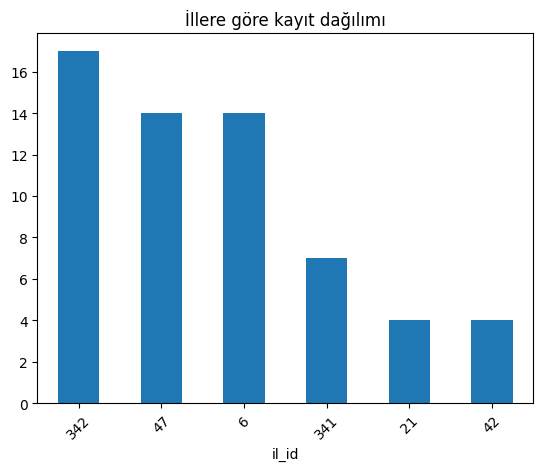

In [14]:
df["il_id"].value_counts().plot(kind="bar",rot=45,title="İllere göre kayıt dağılımı");

In [21]:
dfista = df.groupby("il_id")["gonderi_durum_id"].value_counts().reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


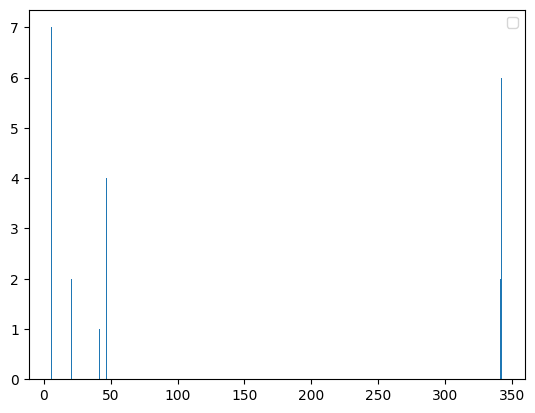

In [38]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.bar(dfista.il_id,dfista["count"])

ax.legend()

<Axes: xlabel='il_id', ylabel='count'>

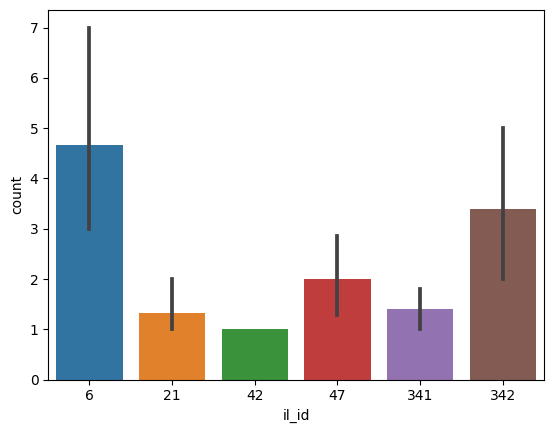

In [50]:
import seaborn as sns
sns.barplot(x=dfista["il_id"],y=dfista["count"])

<Axes: xlabel='il_id', ylabel='count'>

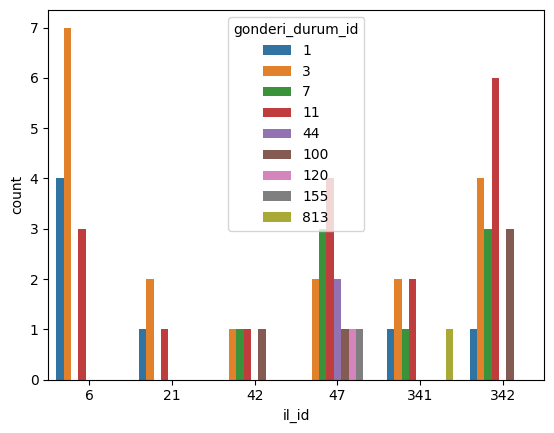

In [52]:
sns.barplot(x=dfista["il_id"],y=dfista["count"],hue=dfista["gonderi_durum_id"])